### Deep Portfolio Optimization

Consider stock $S_t$ and bond $B_t$ and initial Wealth $V_0$. The wealth process is controlled by our trading strategy, equivalently speaking the proportion $\alpha_t$ of wealth $V_t$ we invest in stock, and the rest in bond. 
$$
\frac{dV_t}{V_t} = \alpha_t\frac{dS_t}{S_t} + (1-\alpha_t)\frac{dB_t}{B_t}.
$$
We aim at maximizing our expected utility i.e. 
$$
\max_{\alpha} \mathbb{E}[u(V_T)].
$$
For example, when $B_t$ is exponential and $S_t$ is exponential Brownian Motion
$$
\frac{dB_t}{B_t} = rdt, \quad  \frac{dS_t}{S_t} = \mu dt + \sigma dW_t,
$$
and $u$ be the log utility: $u(x) = \log(x)$. The the optimal $\alpha_t^{*} = \frac{\mu - r}{\sigma^2}$


In [1]:
%load_ext autoreload
%autoreload 2
import sys 
sys.path.append('../src')

## Merton problem

Shape of paths:  torch.Size([10000, 65, 2])
Shape of information:  torch.Size([10000, 65, 2])


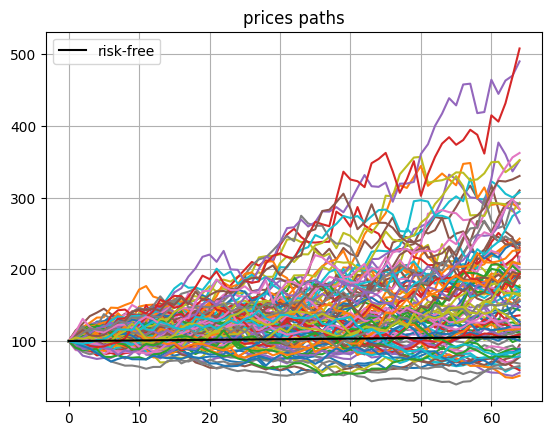

In [2]:
from neuralhedge.data.market import BS_Market
from neuralhedge.utils.plotting import plot_manage_ds
bs_market = BS_Market(n_timestep = 64, dt=1/12, r=0.01)
ds_train = bs_market.get_manage_ds()
ds_test = bs_market.get_manage_ds()
plot_manage_ds(ds_train)

## Merton alpha

In [3]:
from neuralhedge.nn.blackschole import BlackScholesAlpha
from neuralhedge.nn.datamanager import Manager
from neuralhedge.nn.loss import log_utility
from neuralhedge.utils.evaluation import evaluate_merton
merton_strategy = BlackScholesAlpha(mu=bs_market.mu, sigma = bs_market.sigma, r=bs_market.r)
merton_manager = Manager(merton_strategy, utility_func=log_utility)
record_dir = './logutility/mertonalpha'
print(f'Merton weight: {merton_strategy.alpha:.2f}')
evaluate_merton(merton_manager,ds_test,init_wealth=1,record_dir=record_dir)

Merton weight: 2.25
Save evaluation at: ./deeputility/mertonalpha
initial wealth: 1.00
Log utility: 0.57


## Constant alpha

In [4]:
from neuralhedge.nn.datamanager import Manager
from neuralhedge.nn.loss import log_utility
from neuralhedge.nn.network import SingleWeight
from neuralhedge.nn.trainer import Trainer

strategy = SingleWeight()
log_manager = Manager(strategy, utility_func=log_utility)
log_trainer = Trainer(log_manager)
log_trainer.fit(ds_train, EPOCHS=50, lr_scheduler_gamma=0.98) 

Loss=-0.7741181254386902: 100%|██████████| 50/50 [00:28<00:00,  1.76it/s]  


In [5]:
from neuralhedge.utils.evaluation import evaluate_merton
from neuralhedge.utils.plotting import plot_history
record_dir = './logutility/singleweight'
plot_history(log_trainer.history,record_dir)
for p in strategy.parameters():
    print(f'Single weight: {p.item():.2f}')
evaluate_merton(log_manager,ds_test,init_wealth=1,record_dir=record_dir)

Single weight: 2.21
Save evaluation at: ./deeputility/singleweight
initial wealth: 1.00
Log utility: 0.57
